# The Track Collection

This is the first collection of objects in the xAOD event model that does not require any CP calibration code to be executed before accessing it.
Tracks in ATLAS are straight forward - you apply the cuts on your own (or they are done by a derivation). As a result, tracks are simple objects.

Note that tracks are hefty objects - and as a result they are often targets of slimming and thinning. The latter is especially problematic as a method on the `Track` object will fail with an AUX error - because the data backing it is not actually present in the file.

In [1]:
import matplotlib.pyplot as plt
from config import ds_zee as ds

Found backend type matching "xaod". Matching by type is depreciated. Please switch to using the "name" keyword in your servicex.yaml file.
Found backend type matching "xaod". Matching by type is depreciated. Please switch to using the "name" keyword in your servicex.yaml file.
Found backend type matching "xaod". Matching by type is depreciated. Please switch to using the "name" keyword in your servicex.yaml file.
Found backend type matching "xaod". Matching by type is depreciated. Please switch to using the "name" keyword in your servicex.yaml file.
Found backend type matching "xaod". Matching by type is depreciated. Please switch to using the "name" keyword in your servicex.yaml file.


Fetch all the inner detector tracks and plot their $p_T$ and the radius of the first hit on the tracks. Note that unlike the calibrated objects, you must supply the name of the track collection to the `TrackParticles` call. There is no default.

In [2]:
tracks = (ds
        .SelectMany(lambda e: e.TrackParticles("InDetTrackParticles"))
        .Select(lambda t: 
        {
                "pt": t.pt() / 1000.0,
        })
        .AsAwkwardArray()
        .value())

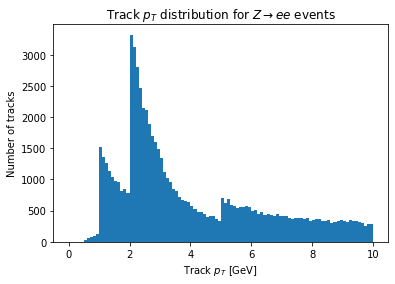

In [3]:
plt.hist(tracks.pt, bins=100, range=(0, 10))
plt.xlabel('Track $p_T$ [GeV]')
plt.ylabel('Number of tracks')
_ = plt.title('Track $p_T$ distribution for $Z\\rightarrow ee$ events')

## The Datamodel

The data model when this documentation was last built was:

In [4]:
from func_adl_servicex_xaodr21.xAOD.trackparticle_v1 import TrackParticle_v1
help(TrackParticle_v1)

Help on class TrackParticle_v1 in module func_adl_servicex_xaodr21.xAOD.trackparticle_v1:

class TrackParticle_v1(builtins.object)
 |  A class
 |  
 |  Methods defined here:
 |  
 |  beamlineTiltX(self) -> 'float'
 |      A method
 |  
 |  beamlineTiltY(self) -> 'float'
 |      A method
 |  
 |  charge(self) -> 'float'
 |      A method
 |  
 |  chiSquared(self) -> 'float'
 |      A method
 |  
 |  clearDecorations(self) -> 'bool'
 |      A method
 |  
 |  d0(self) -> 'float'
 |      A method
 |  
 |  definingParametersCovMatrixVec(self) -> 'func_adl_servicex_xaodr21.vector_float_.vector_float_'
 |      A method
 |  
 |  e(self) -> 'float'
 |      A method
 |  
 |  eta(self) -> 'float'
 |      A method
 |  
 |  hasNonConstStore(self) -> 'bool'
 |      A method
 |  
 |  hasStore(self) -> 'bool'
 |      A method
 |  
 |  hitPattern(self) -> 'int'
 |      A method
 |  
 |  index(self) -> 'int'
 |      A method
 |  
 |  m(self) -> 'float'
 |      A method
 |  
 |  numberDoF(self) -> 'float'

## Further Information

* The [`xAOD::TrackParticle_v1` C++ header file](https://gitlab.cern.ch/atlas/athena/-/blob/21.2/Event/xAOD/xAODTracking/xAODTracking/versions/TrackParticle_v1.h) with all the inline documentation.
* The [Tracking CP group R21 recommendation pages](https://twiki.cern.ch/twiki/bin/view/AtlasProtected/TrackingCPRecsEarly2018#Track_Selection) on the ATLAS TWiki